# Natural language Processing

## creating a Binary classifier with Sarcasm Dataset

In [1]:
import tensorflow as tf
print(tf.__version__)

2.3.0


In [2]:
import json
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

### Getting the Dataset

In [3]:
!wget --no-check-certificate \
  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/sarcasm.json \
  -O /tmp/sarcasm.json

--2020-11-03 12:00:39--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/sarcasm.json
Resolving storage.googleapis.com (storage.googleapis.com)... 142.250.98.128, 142.250.97.128, 74.125.31.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.250.98.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5643545 (5.4M) [application/json]
Saving to: ‘/tmp/sarcasm.json’

/tmp/sarcasm.json   100%[===================>]   5.38M  --.-KB/s    in 0.03s   

2020-11-03 12:00:39 (181 MB/s) - ‘/tmp/sarcasm.json’ saved [5643545/5643545]



### Setting the Hyperparameters

In [4]:
vocab_size = 10000
max_length = 120
embedding_dim = 16
trunc_type = 'post'
oov_tok = '<OOV>'
training_size = 20000
padding_type = 'post'

In [5]:
with open('/tmp/sarcasm.json') as f:
  datastore = json.load(f)

sentences = []
labels = []
for item in datastore:
  sentences.append(item['headline'])
  labels.append(item['is_sarcastic'])

In [6]:
training_sentences = sentences[0:training_size]
testing_sentences = sentences[training_size:]

training_labels = labels[0:training_size]
testing_labels = labels[training_size:]

In [7]:
tokenizer  =Tokenizer(num_words = vocab_size, oov_token = oov_tok)
tokenizer.fit_on_texts(training_sentences)
word_index = tokenizer.word_index
sequences = tokenizer.texts_to_sequences(training_sentences)
padded = pad_sequences(sequences, maxlen = max_length, padding=padding_type, truncating=trunc_type)

testing_sequences = tokenizer.texts_to_sequences(testing_sentences)
testing_padded = pad_sequences(testing_sequences, maxlen = max_length, padding=padding_type, truncating=trunc_type)

We need our padding and labels to be NUMPY array in tensorflow 2.x

In [9]:
import numpy as np
training_padded = np.array(padded)
training_labels = np.array(training_labels)

testing_padded = np.array(testing_padded)
testing_labels = np.array(testing_labels)

In [10]:
model = tf.keras.models.Sequential([
                                    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length = max_length),
                                    tf.keras.layers.GlobalAveragePooling1D(),
                                    tf.keras.layers.Dense(24, activation = 'relu'),
                                    tf.keras.layers.Dense(1, activation ='sigmoid')
])

In [11]:
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 120, 16)           160000    
_________________________________________________________________
global_average_pooling1d (Gl (None, 16)                0         
_________________________________________________________________
dense (Dense)                (None, 24)                408       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 25        
Total params: 160,433
Trainable params: 160,433
Non-trainable params: 0
_________________________________________________________________


In [14]:
num_epochs = 10
history = model.fit(training_padded, training_labels, epochs = num_epochs, validation_data = (testing_padded, testing_labels), verbose = 2)

Epoch 1/10
625/625 - 2s - loss: 0.1209 - accuracy: 0.9591 - val_loss: 0.4667 - val_accuracy: 0.8320
Epoch 2/10
625/625 - 2s - loss: 0.1103 - accuracy: 0.9632 - val_loss: 0.4596 - val_accuracy: 0.8420
Epoch 3/10
625/625 - 2s - loss: 0.1026 - accuracy: 0.9656 - val_loss: 0.4761 - val_accuracy: 0.8441
Epoch 4/10
625/625 - 2s - loss: 0.0945 - accuracy: 0.9691 - val_loss: 0.5070 - val_accuracy: 0.8402
Epoch 5/10
625/625 - 2s - loss: 0.0866 - accuracy: 0.9725 - val_loss: 0.5252 - val_accuracy: 0.8396
Epoch 6/10
625/625 - 2s - loss: 0.0799 - accuracy: 0.9747 - val_loss: 0.5553 - val_accuracy: 0.8380
Epoch 7/10
625/625 - 2s - loss: 0.0731 - accuracy: 0.9776 - val_loss: 0.5838 - val_accuracy: 0.8350
Epoch 8/10
625/625 - 2s - loss: 0.0682 - accuracy: 0.9790 - val_loss: 0.6051 - val_accuracy: 0.8325
Epoch 9/10
625/625 - 2s - loss: 0.0635 - accuracy: 0.9812 - val_loss: 0.6802 - val_accuracy: 0.8246
Epoch 10/10
625/625 - 2s - loss: 0.0586 - accuracy: 0.9823 - val_loss: 0.6752 - val_accuracy: 0.8261

### Visualizing the Training with Graph

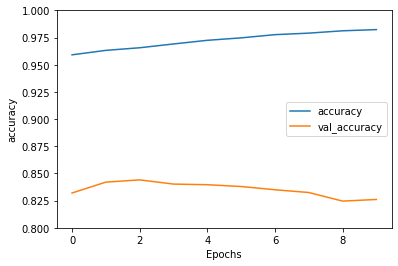

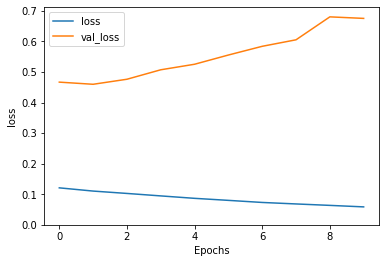

In [18]:
import matplotlib.pyplot as plt

def plot_graphs(history, string, ylim):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.ylim(ylim)
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()

plot_graphs(history, 'accuracy', (0.8,1))
plot_graphs(history, 'loss', (0))